In [75]:
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3   scales_0.5.0    vegan_2.4-4     permute_0.9-4  
 [5] pROC_1.10.0     e1071_1.6-8     pls_2.6-0       klaR_0.6-12    
 [9] MASS_7.3-47     caret_6.0-77    lattice_0.20-35 reshape2_1.4.2 
[13] corrplot_0.84   ggplot2_2.2.1  

loaded via a namespace (and not attached):
 [1] ddalpha_1.3.1        sfsmisc_1.1-1        jsonlite_1.5        
 [4] splines_3.3.3        foreach_1.4.3        prodlim_1.6.1       
 [7] assertthat_0.2.0     stats4_3.3.3         DRR_0.0.2           
[10] robustbase_0.92-8    ipred_0.9-6          glue_1.2.0          
[13] uuid_0.1-2           digest_0.6.12        colorspace_1.3-2    
[16] recipes_0.1.0        Matrix_1.2-11        plyr_1.8.4     

In [76]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);

In [77]:
options(repr.plot.width=4, repr.plot.height=4)

In [78]:
#rm(list=ls(all=TRUE))

#dataset <- read.csv('/Users/jul/git/pipe-generate-dataset/dataset.csv', header=FALSE)
#dataClass <- read.csv('/Users/jul/git/pipe-generate-dataset/dataClass.csv', header=FALSE)

dataset <- read.csv2("/Users/jul/git/pipe-generate-dataset/dataset.csv",header=TRUE,sep=",",dec=".")
dataClass <- read.csv2("/Users/jul/git/pipe-generate-dataset/classMatrix.csv",header=TRUE,sep=",",dec=".")

In [79]:
dim(dataset)

[1] 999 768

In [80]:
colnames(dataset) <- seq(1:768)

In [81]:

data <- data.frame("x"=I(dataset), "y"=as.factor(dataClass[,1]))

In [82]:
filter <- data$x[1,] > 1e9

In [89]:
options(repr.plot.width=8, repr.plot.height=4)
matplot(t(stdev(data$x,1)), type='l')

ERROR: Error in t(stdev(data$x, 1)): could not find function "stdev"


In [102]:
dim(data$x)

[1] 999 768

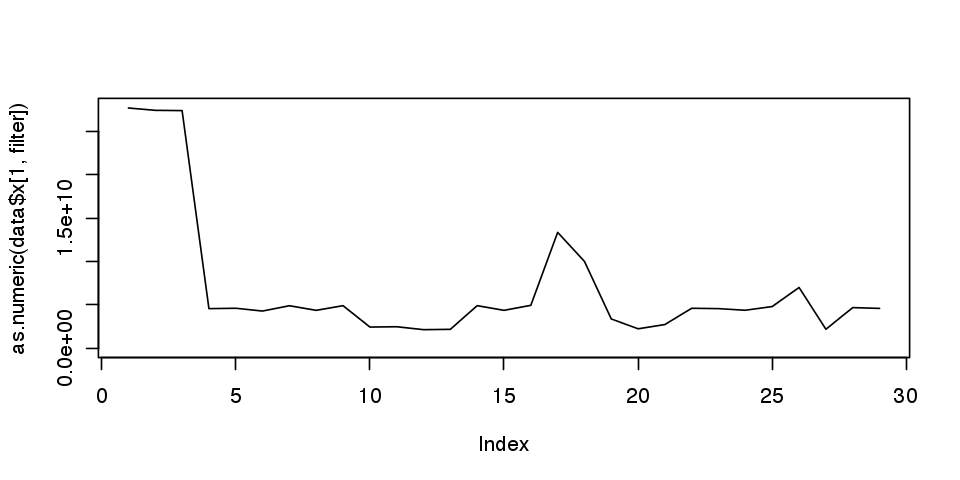

In [88]:
plot(as.numeric(data$x[1, filter]), type='l', ylim=range(data$x[1,]))

In [68]:
pca <- prcomp(data$x[, data$x[1,] > 1e9], scale=FALSE)

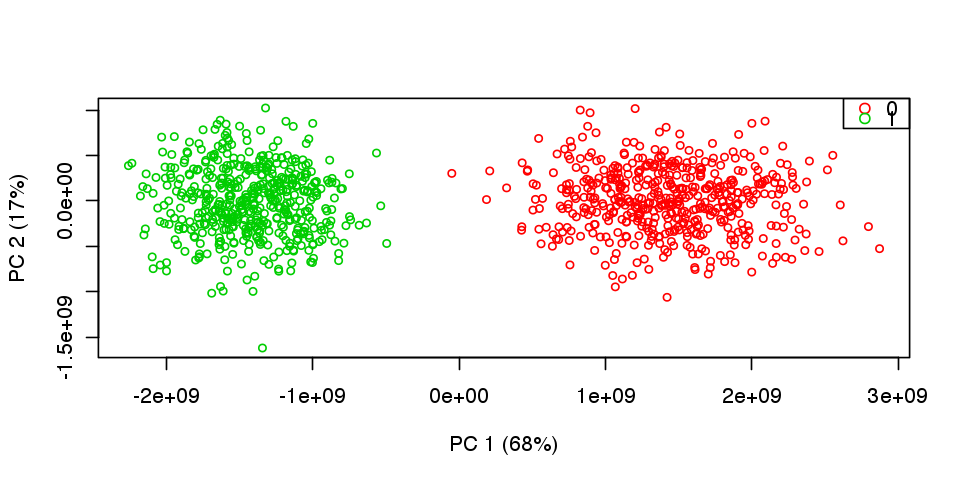

In [69]:
options(repr.plot.width=8, repr.plot.height=4)
pc <- c(1,2)
COLOR <- c(2:4)
ev <- c(round(pca$sdev[pc[1]]/sum(pca$sdev)*100,0),
        round(pca$sdev[pc[2]]/sum(pca$sdev)*100,0),
        round(pca$sdev[pc[3]]/sum(pca$sdev)*100,0))
plot(pca$x[,pc[1]], pca$x[,pc[2]], col=COLOR[data$y], cex=0.7, 
     xlab=paste0("PC ", pc[1], " (", ev[pc[1]], "%)"), 
     ylab=paste0("PC ", pc[2], " (", ev[pc[2]], "%)"))
legend("topright", legend=levels(data$y), col=COLOR, pch=1)

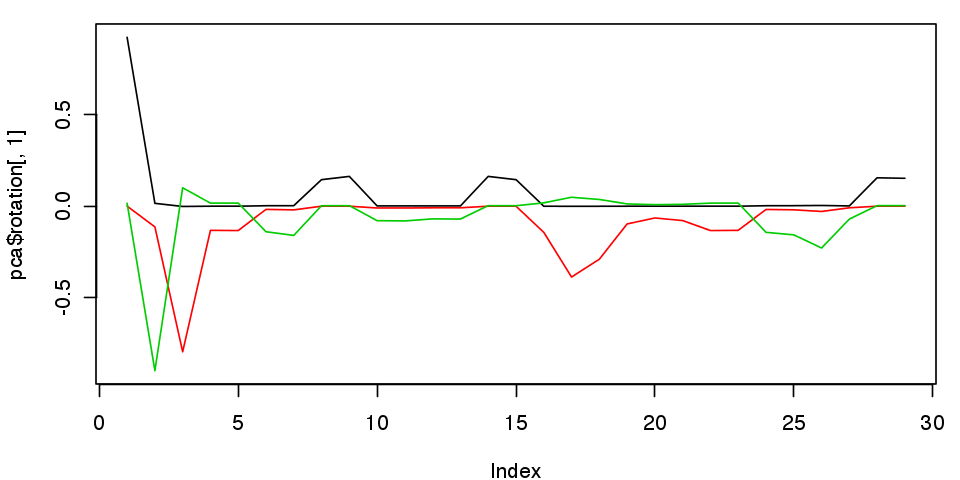

In [62]:
op <- par(mar = c(4,4,1,1))
plot(pca$rotation[,1], type='l', ylim=range(pca$rotation[,1:3]))
lines(pca$rotation[,2], type='l', col=2)
lines(pca$rotation[,3], type='l', col=3)
par(op)

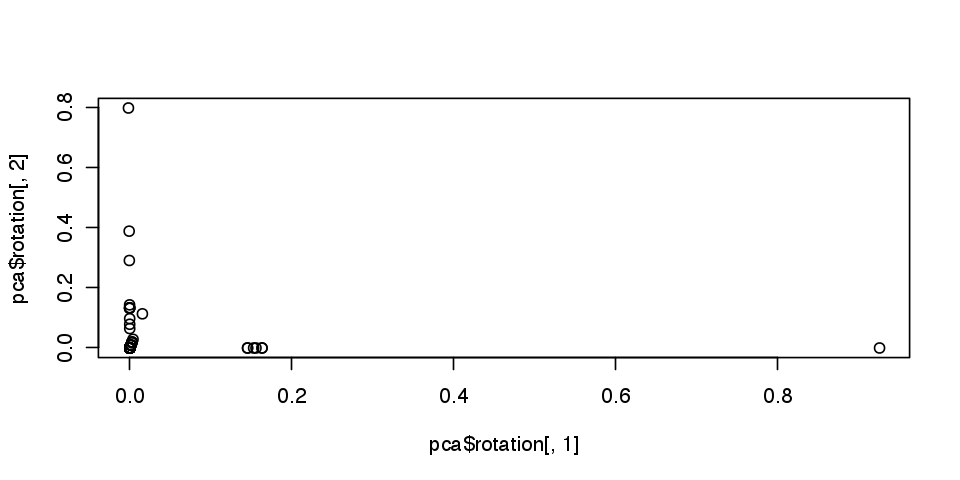

In [39]:
plot(pca$rotation[,1], pca$rotation[,2])

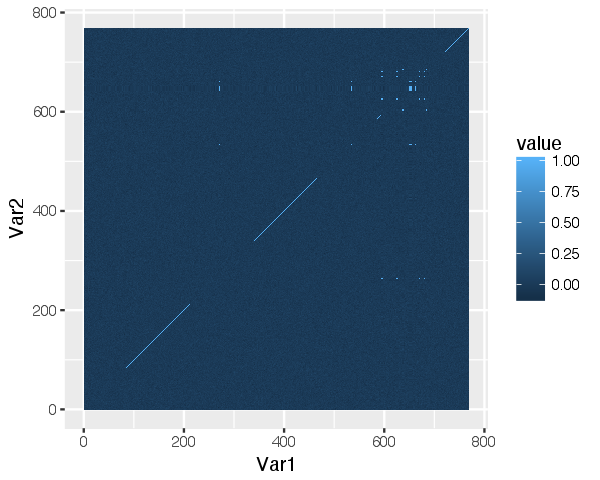

In [23]:
options(repr.plot.width=5, repr.plot.height=4)
qplot(x=Var1, y=Var2, data=melt(cor(data$x)), fill=value, geom="tile")

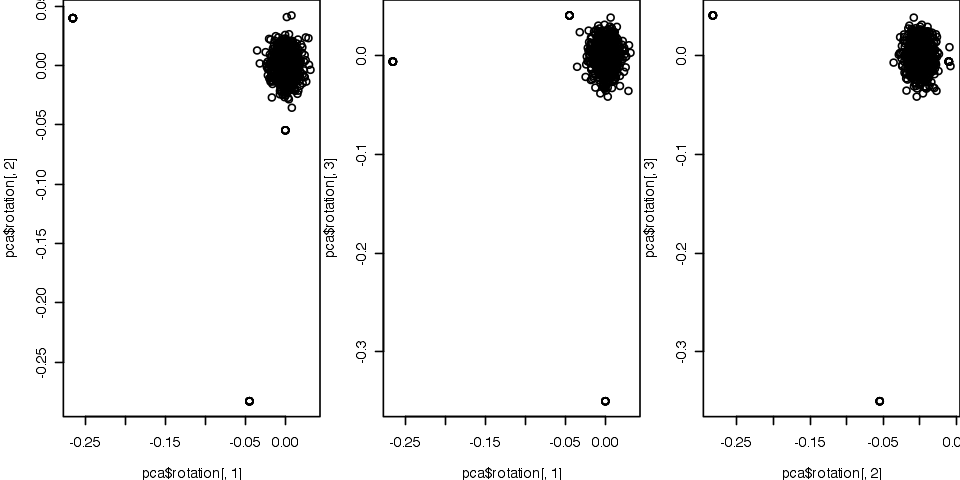

In [35]:
options(repr.plot.width=8, repr.plot.height=4)
layout(matrix(c(1,2,3), 1, 3, byrow = TRUE), 
       widths=c(3,3,3), 
       heights=c(1)) 
op <- par(mar = c(4,4,0,0))
plot(pca$rotation[,1],pca$rotation[,2]); 
plot(pca$rotation[,1],pca$rotation[,3]); 
plot(pca$rotation[,2],pca$rotation[,3])
par(op)

In [45]:
X<-as.matrix(dataset)
Y<-as.numeric(dataClass[,1])

In [46]:
nf = dim(X)[1]
T = c()
P = c()
C = c()
W = c()

In [47]:
for (j in 1:nf) {
  w = (t(X) %*% Y) %*% solve(t(Y) %*% Y)
  w1 = t(w) %*% w
  w2 = abs(sqrt(w1))
  w = w %*% solve(w2)
  t = (X %*% w)
  t1 = t(t) %*% t
  c = t(Y) %*% t %*% solve(t1)
  c1 = t(c) %*% c
  u = Y %*% c %*% solve(c1)
  u1 = t(u) %*% u
  u2 = abs(sqrt(u1))
  p = (t(X) %*% t) %*% solve(t1)
  X = X - (t)%*%t(p)
  T = matrix(c(T, t))
  P = matrix(c(P, p))
  C = matrix(c(C, c))
  W = matrix(c(W, w))
}

In [48]:
T = matrix(T, ncol = nf)
T = scale(T, scale = TRUE, center = TRUE)
P = matrix(P, ncol = nf)
C = matrix(C, ncol = nf)
W = matrix(W, ncol = nf)

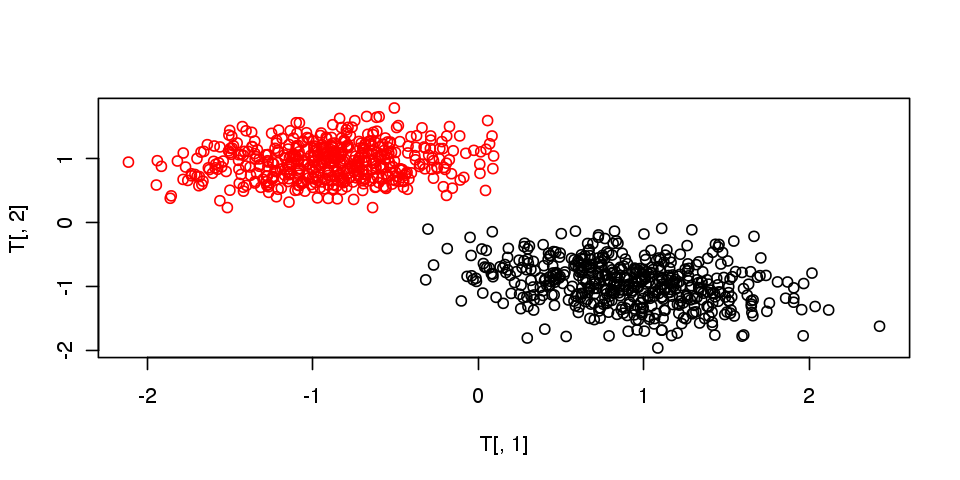

In [49]:
plot(T[,1], T[,2], col = factor(dataClass[,1]))
#text(T[,1], T[,2], dataClass[,1], pos = 2)

In [50]:
nf=15

T = c()
P = c()
C = c()
W = c()
Tortho = c()
Portho = c()
Wortho = c()
Cortho = c()

In [51]:
for (j in 1:nf) {
  w = (t(X) %*% Y) %*% solve(t(Y) %*% Y)
  w=w%*%solve(norm(w))
  t = (X %*% w) %*% solve(t(w) %*% w)
  c = t(Y) %*% t %*% solve(t(t) %*% t)
  u = Y %*% c %*% solve(t(c) %*% c)
  p = (t(X) %*% t) %*% solve(t(t) %*% t)
  wortho = p - w
  wortho= p - t(((t(w)%*%p)%*% solve(t(w)%*%w))%*% t(w))
  wortho= wortho%*%solve(norm(wortho))
  tortho = X %*% wortho %*% solve(t(wortho) %*% wortho)
  portho = t(X) %*% tortho %*% solve(t(tortho) %*% tortho)
  cortho = t(Y) %*% tortho %*% solve(t(tortho) %*% tortho)
  X = X - tortho %*% t(portho)
  T = matrix(c(T, t))
  P = matrix(c(P, p))
  C = matrix(c(C, c))
  W = matrix(c(W, w))
  Tortho = matrix(c(Tortho, tortho))
  Portho = matrix(c(Portho, portho))
  Wortho = matrix(c(Wortho, wortho))
  Cortho = matrix(c(Cortho, cortho))
}

In [52]:
T = matrix(T, ncol = nf)
T = scale(T, scale = TRUE, center = TRUE)
P = matrix(P, ncol = nf)
C = matrix(C, ncol = nf)
W = matrix(W, ncol = nf)
Tortho = matrix(Tortho, ncol = nf)
Tortho = scale(Tortho, scale = TRUE, center = TRUE)
Portho = matrix(Portho, ncol = nf)
Wortho = matrix(Wortho, ncol = nf)
Xortho = Tortho %*% t(Portho)

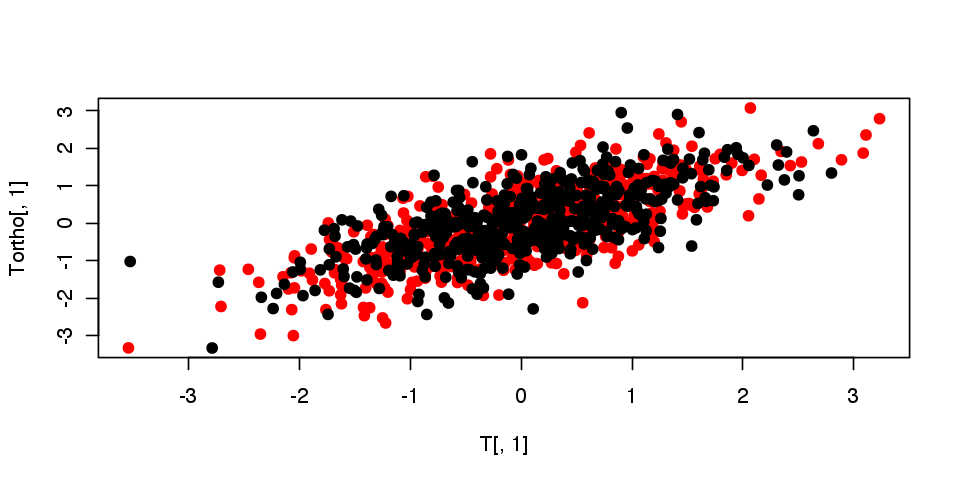

In [54]:
plot(T[,1], Tortho[, 1], pch = 19, col=factor(dataClass[,1]))
#text(T[, 1], Tortho[,1],dataClass[,1], cex=1, pos=2)